# Lecture 8.1 Decision Trees

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Setting and Data
We will use a standard dataset that predicts breast cancer for today's practice. Similar to the iris dataset, the breast_cancer dataset comes with Scikit-Learn package. This is a binary classification dataset (i.e., Y=1 if malignant, Y=0 if benign). We can use the same syntax to learn about the breast_cancer dataset (e.g., variables, observations, etc.) 

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("The dataset has", cancer.data.shape[0], "observations, and", cancer.data.shape[1], "variables") 
print("We have", cancer.target.shape[0], "records for target")
print("The variables are", list(cancer.feature_names))
print("The targets are", list(cancer.target_names))
# Note: to map the y value with the y label(i.e., target_names):
### => The index of each y label in the target_names is the y value
### => for cancer dataset, malignant = 0, and benign = 1

The dataset has 569 observations, and 30 variables
We have 569 records for target
The variables are ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
The targets are ['malignant', 'benign']


In [3]:
from sklearn.model_selection import train_test_split

# Split data into training and test, if test size is not specified, default value  of 0.25 is applied
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42)

## Decision Trees

To train a decision tree model, use syntax:

**<center>sklearn.tree.DecisionTreeClassifier()</center>**

**Key Inputs and Methods:**
- criterion: the function to measure the quality of a split. Manually set to "entropy" for ID3-like algorithm.
- Set random_state for replication purposes (technical). [in case of a tie]
- Use .fit to train the model, .score to obtain the performance measure (accuracy), and .predict for prediction.

**Other Inputs (when not growing the full tree):**
- max_depth: depth of the tree. depth = 1 if split once.
- max_leaf_nodes: the maximum number of leaves in a tree.
- min_samples_leaf: minimum sample size in a leave node. 
- min_samples_split: the minimum sample size for a subset to be further split.


**Attributes**
- max_features: how many features are used to create a tree.
- feature_importances_: the importance of each feature (based on entropy reduction). This may not be reliable if variables have high correlation.

**Practice:**

Train a decision tree classifier. Set random state to 0. Use entropy as the impurity measure.
- Report the train and test accuracy.
- Report the feature importance
- Based on the feature importance, create a bar plot. (Use syntax: plt.bar(x, y). x is the label of bars, y is the height of bars. You may want to change "bar" to "barh" for better representation).
- Create a bar plot of feature importance. Include only those with importance > 0 (Hint: logical indexing).


In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dt_full.fit(X_train, y_train)
dt_full.score(X_train, y_train), dt_full.score(X_test, y_test)

(1.0, 0.958041958041958)

In [ ]:
# 100% training accuracy is never good: overfitting concern in our case
# In real case, consider mechanical problems: var1 = loan amount, y: loan issued?

In [8]:
dt_y = dt_full.feature_importances_ # 0s: variable dropped

dt_y

array([0.        , 0.02295084, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59201781, 0.00679754, 0.        ,
       0.02270496, 0.        , 0.        , 0.        , 0.        ,
       0.01101566, 0.        , 0.01986781, 0.        , 0.        ,
       0.0855317 , 0.09815693, 0.09342687, 0.        , 0.01072974,
       0.        , 0.01404099, 0.02275913, 0.        , 0.        ])

<BarContainer object of 30 artists>

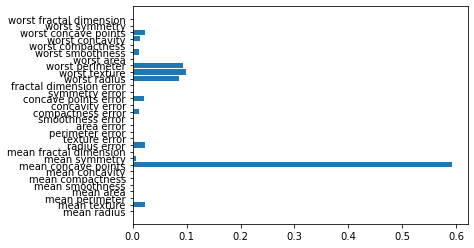

In [14]:
dt_x = cancer.feature_names
plt.barh(dt_x, dt_y)

In [ ]:
## Suppose I want to drop variables with feature importance 0. How should I do? 
## Visualize the feature importances
## Hint: logical indexing
idx = dt_full.feature_importances_>0
tree_xpos = tree_x[idx]
tree_ypos = tree_y[idx]
plt.barh(tree_xpos, tree_ypos)

### Addressing Overfitting 

We twist the "additional inputs" from the Decision Tree to address the overfitting issue. Setting proper values for these parameters can be hard. We use GridSearchCV to search for the best combination of these parameter values.


**Practice**:

- Train a decision tree with maximum depth = 3. Then report the test accuracy.
- Train a decision tree with GridSearchCV, report the best model's hyperparameters, as well as the test accuracy [The model can take several seconds to run]. Set random state to 0 for replication purpose.
    - Choose max_depth from all positive integers below 10
    - Choose min_samples_split from all integers between 2 and 10 (inclusive)
    - Choose max_leaf_nodes from be integers between 2 and 10 (inclusive)

In [15]:
# Let maximum depth be 3

from sklearn.tree import DecisionTreeClassifier

# A Basic Tree
dt_3 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 3)
dt_3.fit(X_train, y_train)
dt_3.score(X_test, y_test)

0.958041958041958

In [16]:
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# go through all possible combinations: 9*9*9 models, with 5 fold cv
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), # improper way to specify, should be a larger number
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [17]:
# Report the best hyperparameters chosen
grid_tree.best_params_

{'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_split': 9}

In [ ]:
# Tuned model same as naive one? 
## No. multiple criterion, different impurity measures
## .score(X_test, y_test):

## S1: use X_test to predict; 
## S3: compare predicted with y_test

### *Visualizing the tree (Extension)*

Use syntax: **tree.export_text(TREE_MODEL_NAME)** to obtain the rules. You need to import the tree module first. (i.e., from sklearn import tree)


Use syntax: **sklearn.tree.plot_tree(estimator, feature_names, class_names, impurity)** to show the tree. 

Refer to the sample code below. *[plt.figure() is used create a figure object (you can imagine it as a canvas).]*

In [18]:
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_)) # inside bracket, can be dt_3, dt_full, etc.

# Reminder: your model name should not be "tree" itself

|--- feature_7 <= 0.05
|   |--- feature_20 <= 16.83
|   |   |--- class: 1
|   |--- feature_20 >  16.83
|   |   |--- class: 0
|--- feature_7 >  0.05
|   |--- feature_21 <= 20.40
|   |   |--- feature_22 <= 119.65
|   |   |   |--- class: 1
|   |   |--- feature_22 >  119.65
|   |   |   |--- class: 0
|   |--- feature_21 >  20.40
|   |   |--- feature_23 <= 718.65
|   |   |   |--- class: 1
|   |   |--- feature_23 >  718.65
|   |   |   |--- class: 0



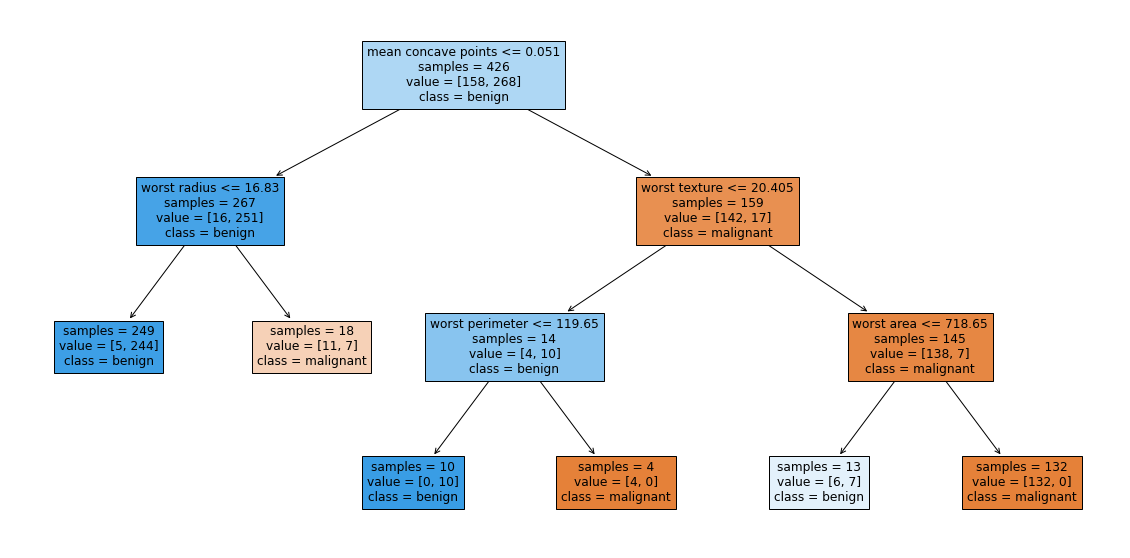

In [19]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = cancer.feature_names, # specify variable names 
               class_names = cancer.target_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()

# save the figure to read through the boxes, it is saved under the same directory as the coding doc.
# fig.savefig("grid_tree.jpg")

# Left hand branch is negative value (Yes); RHS is No

In [ ]:
# pip install graphviz # To install graphviz package
# An Alternative way for (maybe better) DT Visualization
import graphviz
tree_dot = tree.export_graphviz(grid_tree.best_estimator_,
                                feature_names=cancer.feature_names,  
                                class_names=cancer.target_names)
graphviz.Source(tree_dot)
